# Model Selection

Now that we've successfully pre-processed the data, we can move to building ML models.

We will use the following models (building multiple models for each with different input variables and parameters):
- Logistic Regression
- Decision Tree
- Random Forest
- k-Nearest Neighbor
- Support Vector Machine (SVM)
- Naive Bayes
- Neural Network
- Linear Perceptron
- **Gradient Boosting Machines**

### Gradient Boosting Machine (XGBoost)

We will create different XGBoost models based on the following parameters:
- Different dataset combinations:
    - Numeric
    - Binary
    - Categorical
    - Numeric + Binary
    - Numeric + Categorical
    - Binary + Categorical
    - Numeric + Binary + Categorical
- Number of Hidden Layers:
    - 0
    - 1
    - 2
    - 3
- Number of Dropout Layers:
    - 0
    - 1
- Number of Nodes per Hidden Layer:
    - 8
    - 16
    - 32
    
We will evaluate these models based on:
- 2x2 Confusion Matrix
- Precision, Recall, F-1 Score
- ROC Curve
- Precision-Recall Curve

Note: We will not use a simple accuracy score due to our dataset being dominated by roughly 90% of non-default data

In [21]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV

from xgboost import XGBClassifier

from sklearn.metrics import (confusion_matrix, 
                             classification_report,
                             precision_recall_curve,
                             average_precision_score,
                             roc_curve,
                             roc_auc_score,
                             log_loss)

#### Different Datasets

In [2]:
df_auto_loan_numeric_std = pd.read_csv('df_auto_loan_numeric_std.csv').set_index('ID')
df_auto_loan_binary = pd.read_csv('df_auto_loan_binary.csv').set_index('ID')
df_auto_loan_categorical = pd.read_csv('df_auto_loan_categorical.csv').set_index('ID')
df_auto_loan_numeric_binary_std = pd.read_csv('df_auto_loan_numeric_binary_std.csv').set_index('ID')
df_auto_loan_numeric_categorical_std = pd.read_csv('df_auto_loan_numeric_categorical_std.csv').set_index('ID')
df_auto_loan_binary_categorical = pd.read_csv('df_auto_loan_binary_categorical.csv').set_index('ID')
df_auto_loan_numeric_binary_categorical_std = pd.read_csv('df_auto_loan_numeric_binary_categorical_std.csv').set_index('ID')


In [3]:
df_dict = {'Numeric': df_auto_loan_numeric_std, 
           'Binary': df_auto_loan_binary,
           'Categorical': df_auto_loan_categorical,
           'Numeric + Binary': df_auto_loan_numeric_binary_std,
           'Numeric + Categorical': df_auto_loan_numeric_categorical_std,
           'Binary + Categorical': df_auto_loan_binary_categorical,
           'Numeric + Binary + Categorical': df_auto_loan_numeric_binary_categorical_std}

In [10]:
default_counter = dict(Counter(df_auto_loan_numeric_binary_categorical_std['Default']))
scale_pos_weight = 10 * default_counter[0] / (default_counter[0] + default_counter[1])
scale_pos_weight

9.135467144047656

Numeric


/Users/suhaib/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [16:26:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


ROC AUC: 0.6461356038725778
              precision    recall  f1-score   support

           0       0.93      0.78      0.85     17759
           1       0.15      0.41      0.22      1681

    accuracy                           0.75     19440
   macro avg       0.54      0.60      0.54     19440
weighted avg       0.87      0.75      0.80     19440



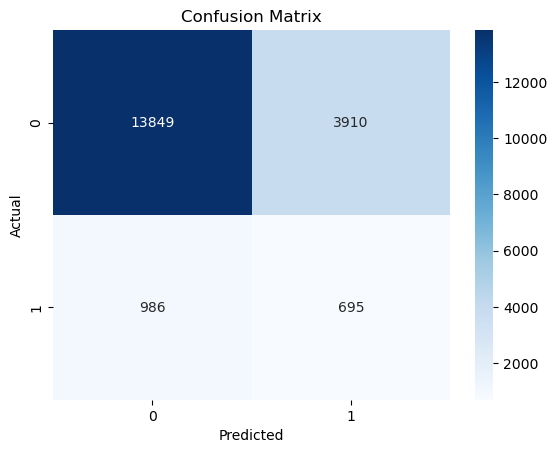

Binary
ROC AUC: 0.5459089557157955
              precision    recall  f1-score   support

           0       0.92      0.76      0.83     17759
           1       0.10      0.28      0.15      1681

    accuracy                           0.72     19440
   macro avg       0.51      0.52      0.49     19440
weighted avg       0.85      0.72      0.77     19440



/Users/suhaib/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [16:26:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


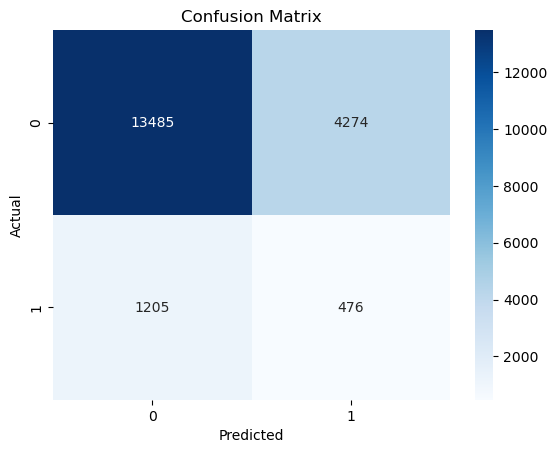

Categorical


/Users/suhaib/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [16:26:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


ROC AUC: 0.5873265020770693
              precision    recall  f1-score   support

           0       0.93      0.52      0.67     17759
           1       0.11      0.61      0.18      1681

    accuracy                           0.53     19440
   macro avg       0.52      0.57      0.43     19440
weighted avg       0.86      0.53      0.63     19440



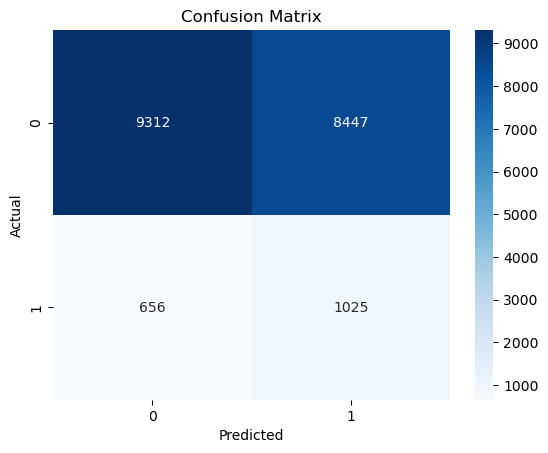

Numeric + Binary


/Users/suhaib/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [16:26:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


ROC AUC: 0.6569472411689338
              precision    recall  f1-score   support

           0       0.94      0.78      0.85     17759
           1       0.16      0.45      0.24      1681

    accuracy                           0.76     19440
   macro avg       0.55      0.62      0.55     19440
weighted avg       0.87      0.76      0.80     19440



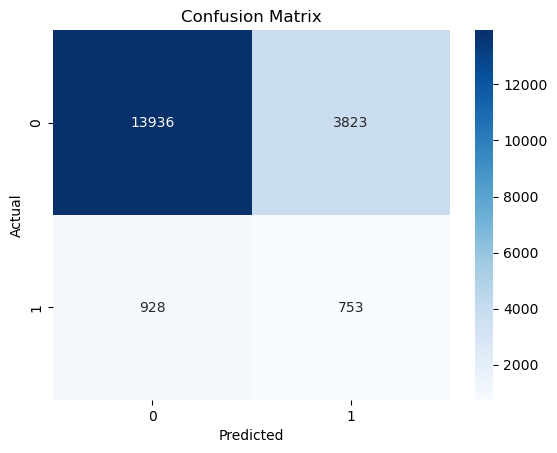

Numeric + Categorical


/Users/suhaib/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [16:26:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


ROC AUC: 0.6476654060735649
              precision    recall  f1-score   support

           0       0.93      0.79      0.86     17759
           1       0.16      0.42      0.23      1681

    accuracy                           0.76     19440
   macro avg       0.55      0.60      0.54     19440
weighted avg       0.87      0.76      0.80     19440



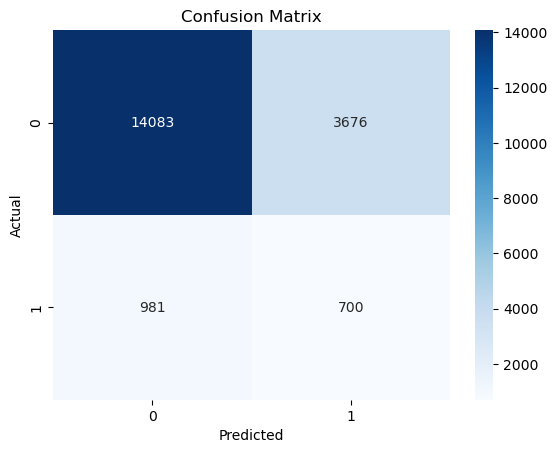

Binary + Categorical


/Users/suhaib/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [16:26:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


ROC AUC: 0.586893562259104
              precision    recall  f1-score   support

           0       0.93      0.61      0.74     17759
           1       0.11      0.51      0.18      1681

    accuracy                           0.60     19440
   macro avg       0.52      0.56      0.46     19440
weighted avg       0.86      0.60      0.69     19440



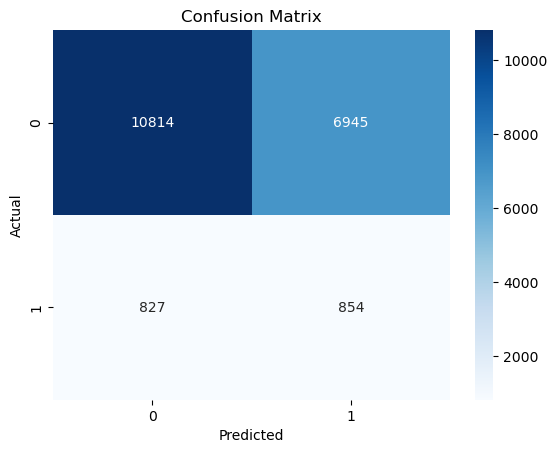

Numeric + Binary + Categorical


/Users/suhaib/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [16:26:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


ROC AUC: 0.6575873971820272
              precision    recall  f1-score   support

           0       0.94      0.80      0.86     17759
           1       0.16      0.42      0.23      1681

    accuracy                           0.76     19440
   macro avg       0.55      0.61      0.55     19440
weighted avg       0.87      0.76      0.81     19440



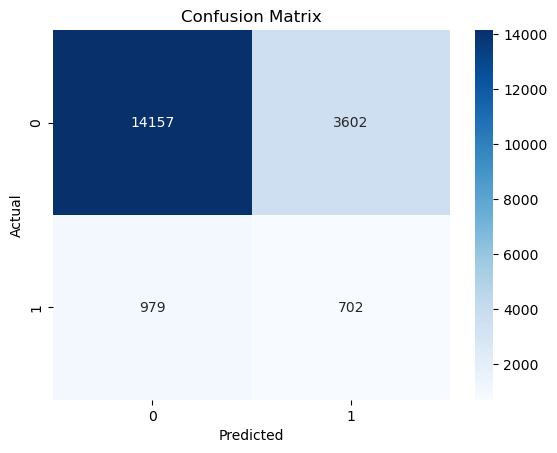

In [35]:
for df_name, df in df_dict.items():
    print(df_name)
    X_data = df.loc[:,[col for col in df.columns if col != 'Default']].values
    y_data = df.loc[:, 'Default'].values.astype(int)
    
    X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                        y_data,
                                                        test_size=0.3,
                                                        stratify=y_data)
    xgb_clf = XGBClassifier(use_label_encoder=False,
                            eval_metric='logloss',
                            scale_pos_weight=scale_pos_weight)
    xgb_clf.fit(X_train, y_train)
    
    y_pred = xgb_clf.predict(X_test)
    y_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]
    
    print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))
    
    print(classification_report(y_test, y_pred))
        
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

#### Different Datasets Reflection


Moving forward, we will continue to use only the 'Numeric + Binary + Categorical' dataset since this includes all of the selected data and has one of the better f1-scores.

In [16]:
df = df_auto_loan_numeric_binary_categorical_std

### Additional Parameter Tuning

We will utilize GridSearchCV to optimize the remaining parameters.

In [22]:
xgb_clf = XGBClassifier(use_label_encoder=False,
                            eval_metric='logloss',
                            scale_pos_weight=scale_pos_weight)

param_grid = {
    'n_estimators': [100, 250, 600, 1000],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [24]:
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,               
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/Users/suhaib/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:56:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/suhaib/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:56:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/suhaib/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:56:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/suhaib/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:56:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not use

/Users/suhaib/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:56:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/suhaib/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:56:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/suhaib/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:56:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/suhaib/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:56:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not use

/Users/suhaib/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:57:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/suhaib/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:57:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/suhaib/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:57:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/suhaib/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:57:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not use

/Users/suhaib/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:57:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/suhaib/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:57:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/suhaib/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:57:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/suhaib/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:57:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not use

/Users/suhaib/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:57:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/suhaib/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:57:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/suhaib/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:57:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/suhaib/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:57:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not use

/Users/suhaib/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:57:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/suhaib/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:57:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/suhaib/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:57:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/suhaib/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:57:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not use

/Users/suhaib/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:57:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/suhaib/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:57:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/suhaib/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:57:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/suhaib/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:57:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not use

/Users/suhaib/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:57:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/suhaib/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:57:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/suhaib/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:57:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/suhaib/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:57:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not use

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 250, 600, 1000],
                         'subsample': [0.8, 1.0]},
             scoring='roc_auc', verbose=1)

In [31]:
pd.set_option('display.max_colwidth', None)
grid_search_results = pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score')
grid_search_results.loc[:, ['params', 'mean_test_score']]

,params,mean_test_score
25,"{'colsample_bytree': 1.0, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}",0.658265
1,"{'colsample_bytree': 0.8, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}",0.658244
3,"{'colsample_bytree': 0.8, 'max_depth': 3, 'n_estimators': 250, 'subsample': 1.0}",0.657186
27,"{'colsample_bytree': 1.0, 'max_depth': 3, 'n_estimators': 250, 'subsample': 1.0}",0.656924
24,"{'colsample_bytree': 1.0, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}",0.656259
9,"{'colsample_bytree': 0.8, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}",0.655915
33,"{'colsample_bytree': 1.0, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}",0.655789
26,"{'colsample_bytree': 1.0, 'max_depth': 3, 'n_estimators': 250, 'subsample': 0.8}",0.654916
0,"{'colsample_bytree': 0.8, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}",0.654731
11,"{'colsample_bytree': 0.8, 'max_depth': 5, 'n_estimators': 250, 'subsample': 1.0}",0.654353


ROC AUC: 0.6550671042481364
              precision    recall  f1-score   support

           0       0.94      0.70      0.80     17759
           1       0.14      0.51      0.22      1681

    accuracy                           0.69     19440
   macro avg       0.54      0.61      0.51     19440
weighted avg       0.87      0.69      0.75     19440



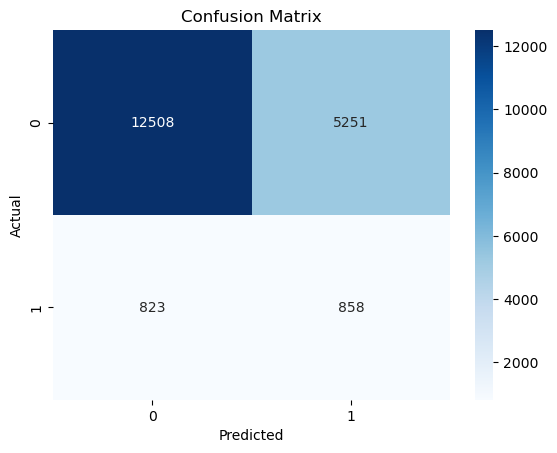

In [32]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("ROC AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#### Additional Parameter Tuning Reflection

As we can see in the above dataframe, changing the parameters of the XGBoost model didn't offer any significant change in the performance of the models. Additionally, we noticed that our best model had similar results to our initial, full dataset model that did not have any hyperparameters (this included a similar ROC AUC score, and similar precision, recall, and f1-scores when predicting the default=1 class).

Moving forward, we will use our full dataset model without any additional parameters due to its similar performance and lower level of complexity.

### Optimal XGBoost Model Result (Full Dataset, no Additional Parameters)

/Users/suhaib/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [17:43:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.94      0.80      0.86     17759
           1       0.17      0.43      0.25      1681

    accuracy                           0.77     19440
   macro avg       0.55      0.62      0.56     19440
weighted avg       0.87      0.77      0.81     19440



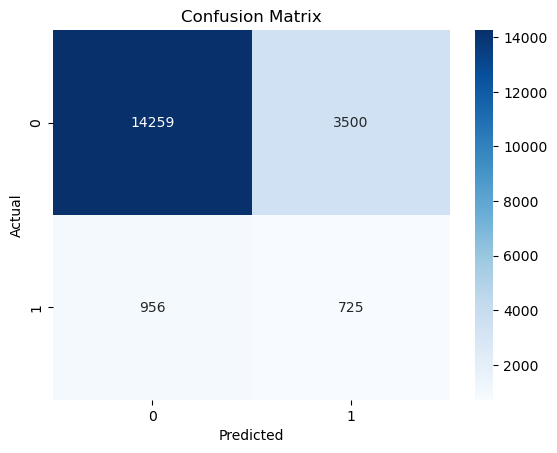

/var/folders/w5/srvyynsx0xl0xdcy3blxc3800000gp/T/ipykernel_36863/3660485254.py:31: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='red')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


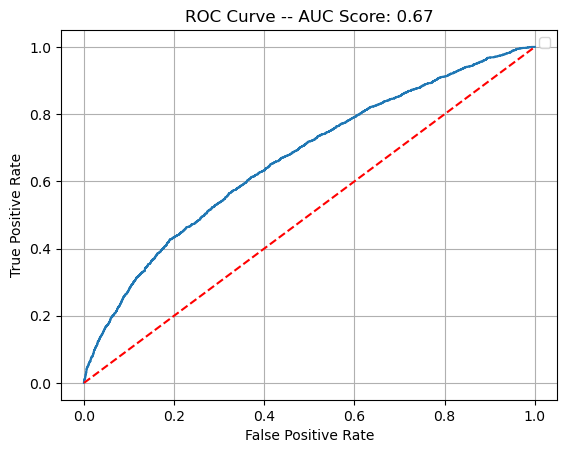

/var/folders/w5/srvyynsx0xl0xdcy3blxc3800000gp/T/ipykernel_36863/3660485254.py:45: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(np.linspace(0, 1, 10000), [y_test.mean()] * 10000, 'k--', color='red')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


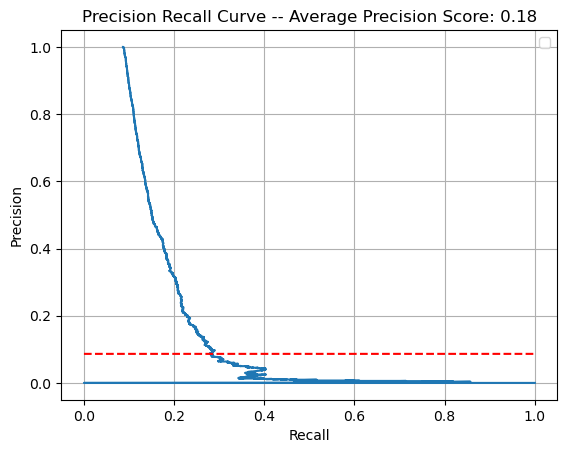

In [36]:
X_data = df.loc[:,[col for col in df.columns if col != 'Default']].values
y_data = df.loc[:, 'Default'].values.astype(int)
    
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    y_data,
                                                    test_size=0.3,
                                                    stratify=y_data)
xgb_clf = XGBClassifier(use_label_encoder=False,
                            eval_metric='logloss',
                            scale_pos_weight=scale_pos_weight)
xgb_clf.fit(X_train, y_train)
    
y_pred = xgb_clf.predict(X_test)
y_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]
    
print(classification_report(y_test, y_pred))

#Optimal Model Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Optimal Model ROC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)
plt.figure()
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], [0, 1], 'k--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve -- AUC Score: {round(auc_score, 2)}')
plt.grid(True)
plt.legend()
plt.show()


#Optimal Model Precision Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
ap_score = average_precision_score(y_test, y_pred_proba)
plt.figure()
plt.plot(precision, recall)
plt.plot(np.linspace(0, 1, 10000), [y_test.mean()] * 10000, 'k--', color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision Recall Curve -- Average Precision Score: {round(ap_score, 2)}')
plt.grid(True)
plt.legend()
plt.show()

### Reflection

Compared to our Logistic Regression and Neural Network models, our XGBoost model shows some signs of improvement in the f1-score, ROC AUC score, and Average Precision Score

- f1-score (for default=1 class)
    - XGBoost: 0.25
    - Logistic Regression: 0.21
    - Neural Network: 0.21
    - This demonstrates that the XGBoost model does better at balancing both precision and recall for the default=1 class
- ROC AUC score
    - XGBoost: 0.67
    - Logistic Regression: 0.65
    - Neural Network: 0.64
    - This demonstrates that the XGBoost model is slightly better at correctly identifying defaults and non-defaults
- Average Precision Score (Precision Recall Curve)
    - XGBoost: 0.18
    - Logistic Regression: 0.14
    - Neural Network: 0.13
    - This demonstrates that the XGBoost model is more effective at predicting the default=1 class.
    
Overall, this is sufficient information for us to select the XGBoost model instead of the Logistic Regression model, as there is a significant improvement we can see in the f1-score and Average Precision Score. This increase in performance is enough to outweigh the increase in complexity of the XGBoost model.

We still need to find a more viable model, as the Precision Recall Curve still drops below our line of random guessing at a very early point. Moving forward, we will continue using XGBoost as our optimal model until we find something superior.
